In [112]:
%load_ext autoreload
%autoreload 2

import nolearn.lasagne.visualize 

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
from stats import Stats

Loaded /home/d/patches//cylinder1/ in 0.00241494178772 seconds.
Using test set: ['image', 'prob', 'merged_array', 'border_overlap']

Precision/Recall:
             precision    recall  f1-score   support

          0       0.94      0.87      0.90     13408
          1       0.88      0.94      0.91     13408

avg / total       0.91      0.90      0.90     26816

Test Accuracy: 0.904609188544
Accuracy Score: 0.904609188544


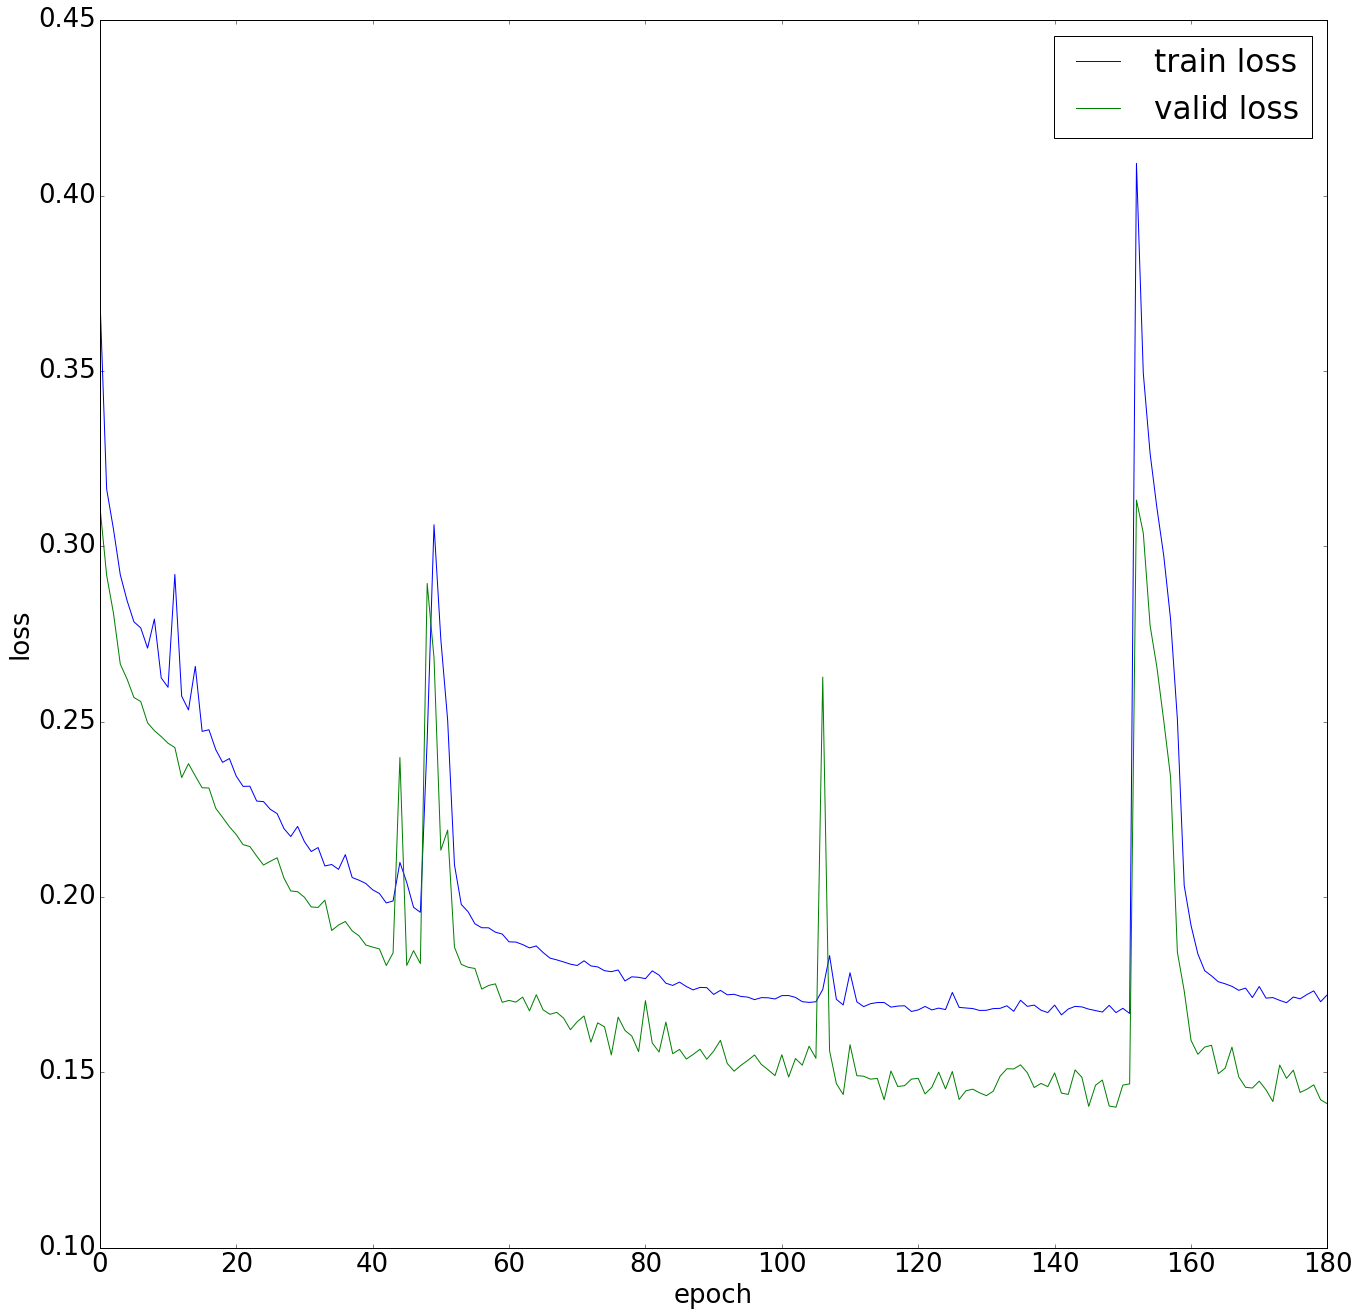

In [136]:
cnn1 = '/home/d/nets/MergeNetDropout_cylinder1_border_overlap_dropout_usevars/net.p'
cnn2 = '/home/d/nets/MergeNetDropout_cylinder1_larger_border_overlap_dropout_usevars/net.p'
cnn3 = '/home/d/nets/MergeNetThreeLegDropout_cylinder1_larger_border_overlap_dropout_usevars/net.p'

cnn, loss_plot, y_test, test_prediction, test_prediction_prob = Stats.load_cnn(cnn1)

In [130]:
y_test, test_prediction

(array([0, 1, 1, ..., 1, 1, 1], dtype=uint8), array([0, 1, 1, ..., 1, 1, 1]))

In [148]:
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc


In [151]:
print classification_report(y_test, test_prediction)

             precision    recall  f1-score   support

          0       0.94      0.87      0.90     13408
          1       0.88      0.94      0.91     13408

avg / total       0.91      0.90      0.90     26816



In [165]:
print classification_report(y_test, np.round(test_prediction_prob[:,1]))

             precision    recall  f1-score   support

          0       0.94      0.87      0.90     13408
          1       0.88      0.94      0.91     13408

avg / total       0.91      0.90      0.90     26816



In [158]:
test_prediction_prob

array([[  1.00000000e+00,   8.69106107e-11],
       [  6.25640766e-08,   9.99999881e-01],
       [  3.78781080e-01,   6.21218979e-01],
       ..., 
       [  2.84530908e-01,   7.15469122e-01],
       [  3.87635618e-03,   9.96123612e-01],
       [  2.78253835e-02,   9.72174585e-01]], dtype=float32)

In [162]:
test_prediction_prob[:,1].astype(np.uint8)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [163]:
np.round(test_prediction_prob[:,1].astype())

array([ 0.,  1.,  1., ...,  1.,  1.,  1.], dtype=float32)

In [164]:
y_test

array([0, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [140]:
fpr, tpr, _ = roc_curve(y_test, test_prediction_prob[:,1])

In [ ]:
    from collections import Counter

    counts = Counter(fixes)
    P = counts['Good']
    N = counts['Bad']
    TP_P = []
    TN_N = []
    for i,f in enumerate(fixes):
        counts_ = Counter(fixes[0:i+1])
        TP_P.append(float(counts_['Good'])/P)
        TN_N.append(float(counts_['Bad'])/N)    


In [133]:
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc

auc(TN_N, TP_P)

0.89663590270991755

In [134]:
y_pred = cnn.predict_proba({X_test['image']})

TypeError: object of type 'NpzFile' has no len()

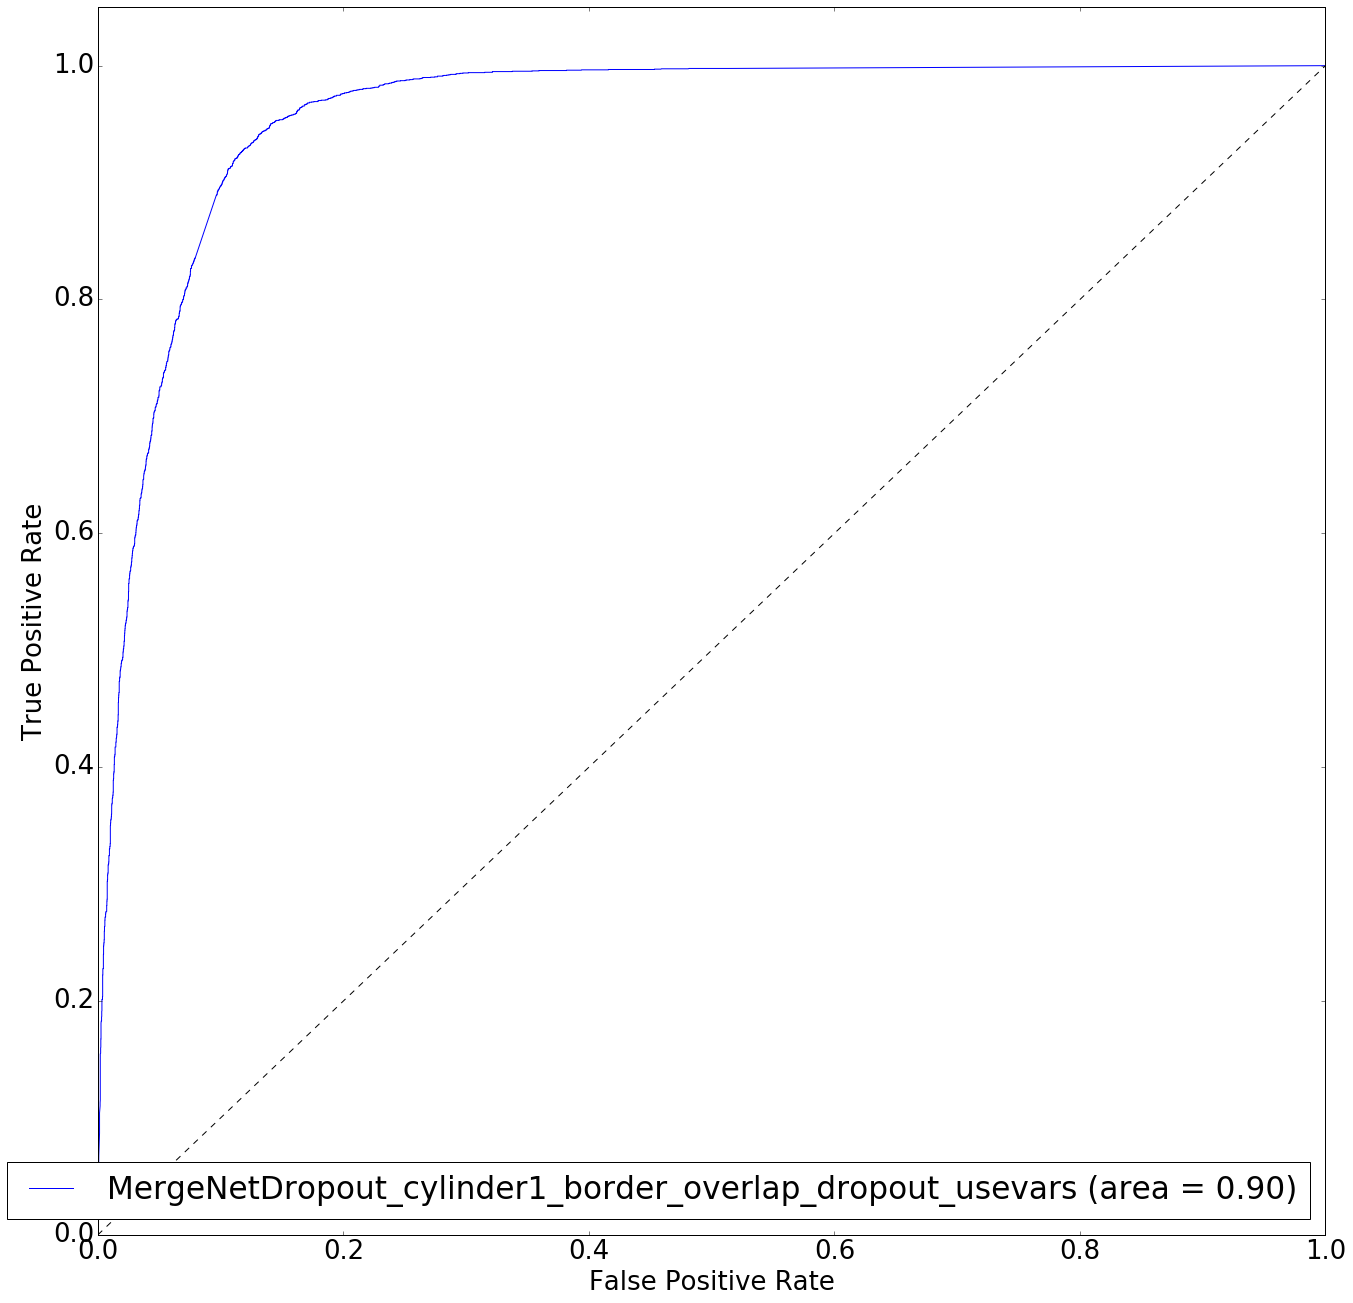

In [146]:
plt.figure(figsize=(22,22))
plt.plot(fpr, tpr, label=cnn.uuid+' (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

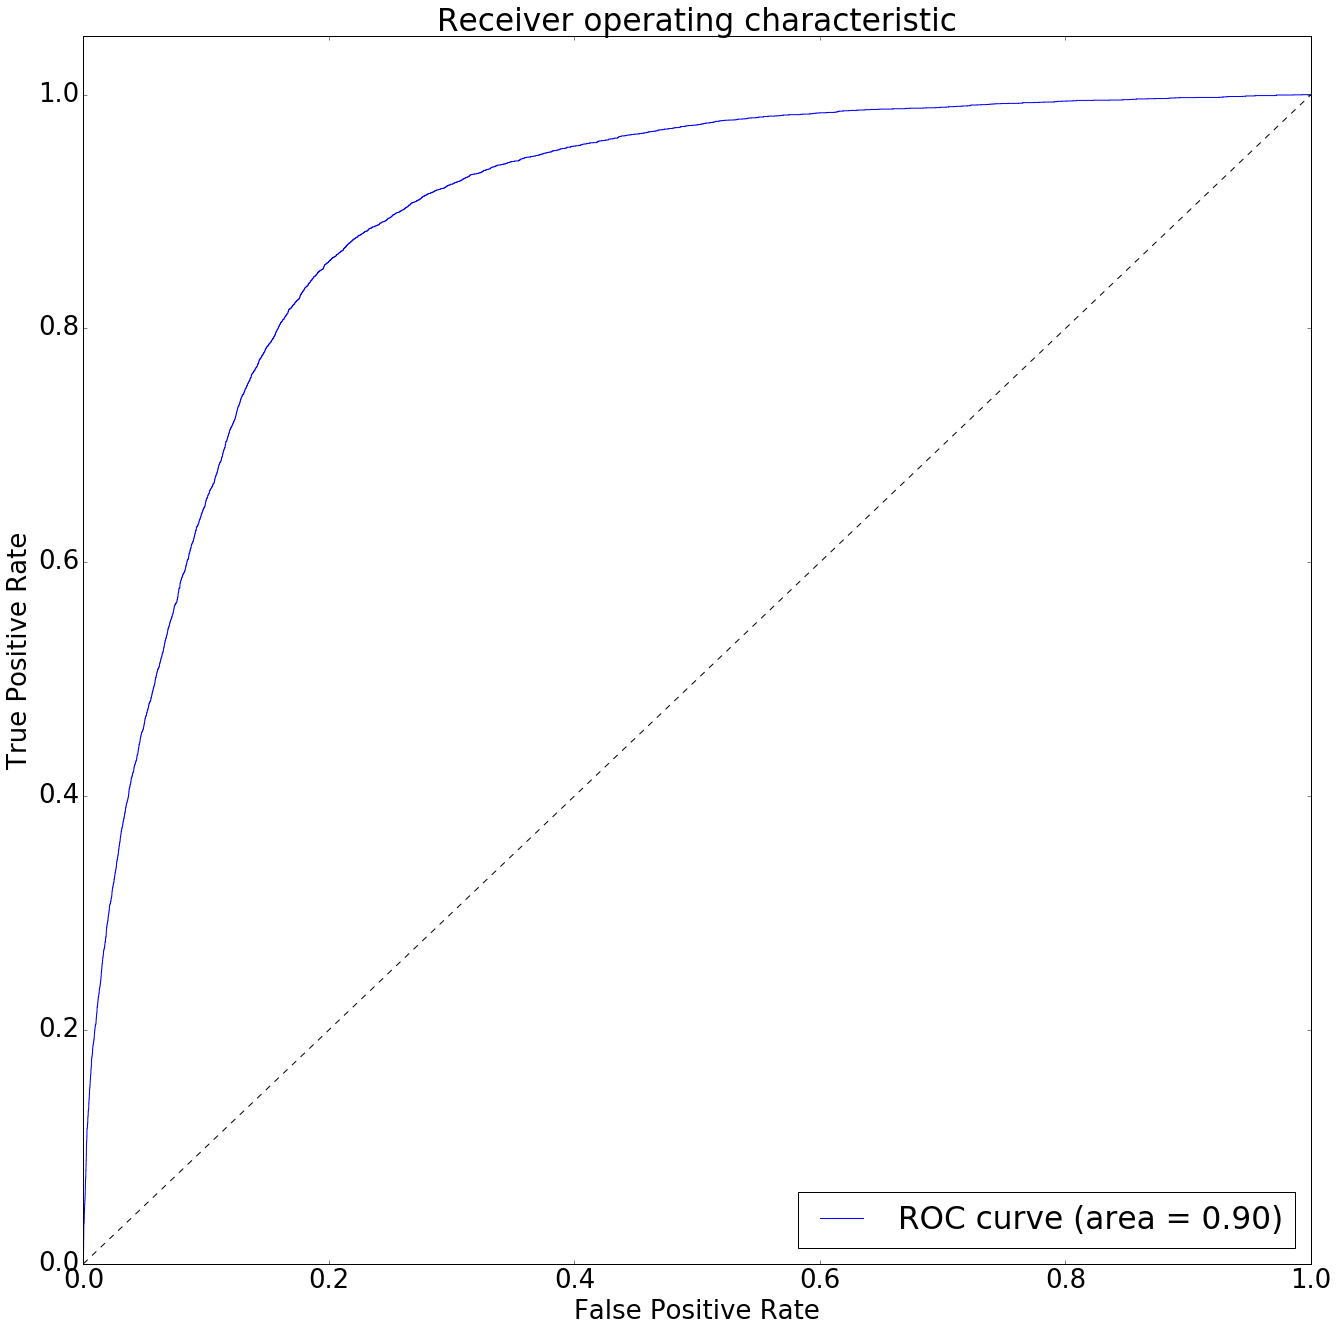

In [147]:
plt.figure(figsize=(22,22))
plt.plot(TN_N, TP_P, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [167]:
cnn.image_dropout_p

0.2

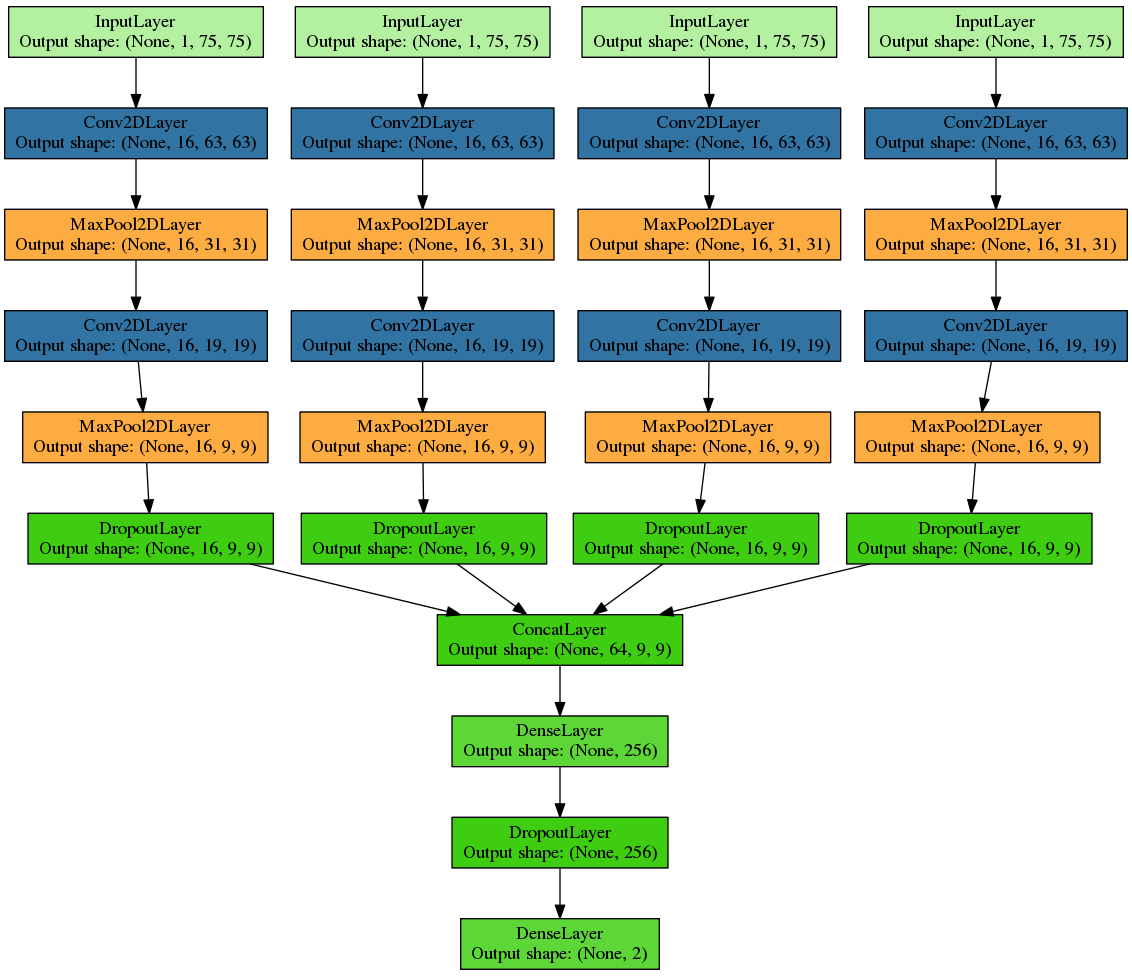

In [115]:
nolearn.lasagne.visualize.draw_to_notebook(cnn)

Loading merge errors from file..
13  merge errors found.
Loading dojo bigM from file..

Loading merge errors p < .05 and split errors p > .95 from file..
   Mean VI improvement 0.0204911164292
   Median VI improvement -0.000565891970564

Loading merge errors p < .01 and split errors p > .99 from file..
   Mean VI improvement 0.0159640757687
   Median VI improvement 0.0134332338102

Loading merge errors and split errors (simulated user) from file..
   Mean VI improvement 0.116963974513
   Median VI improvement 0.084477058084

Loading merge errors and split errors (simulated user) with error rates from file..


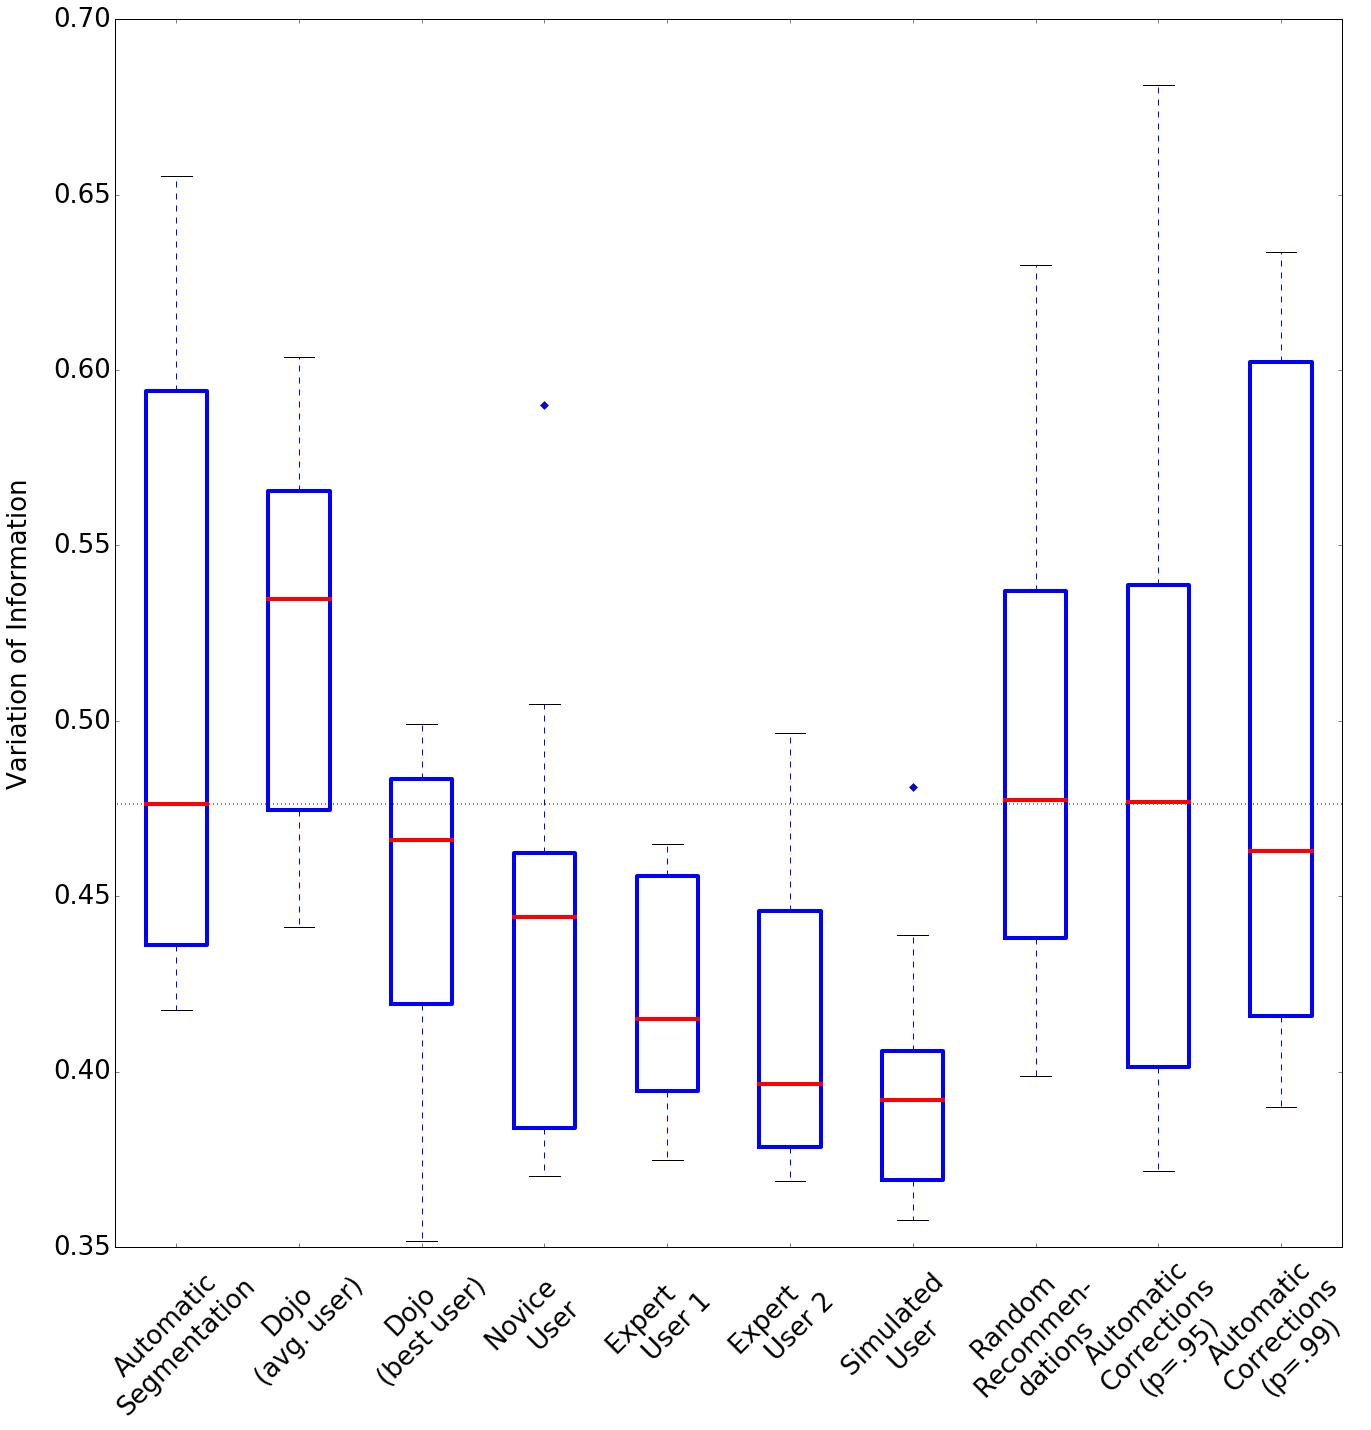

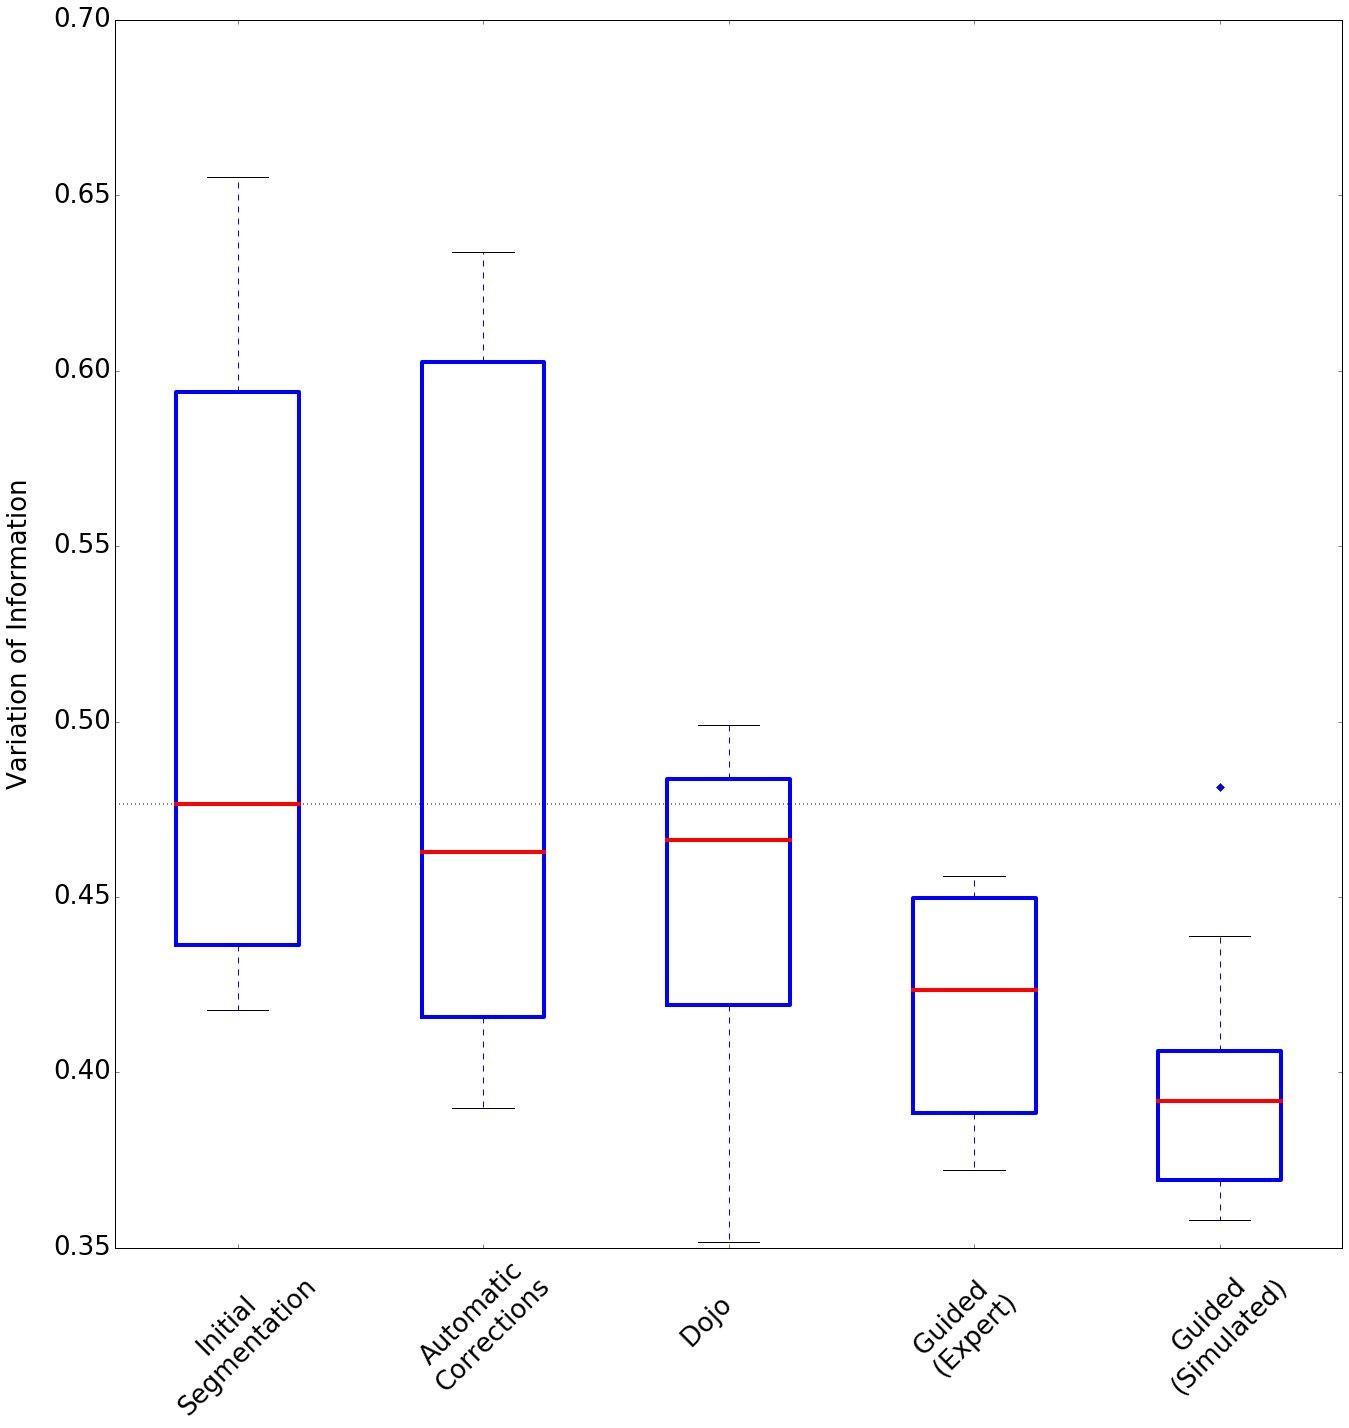

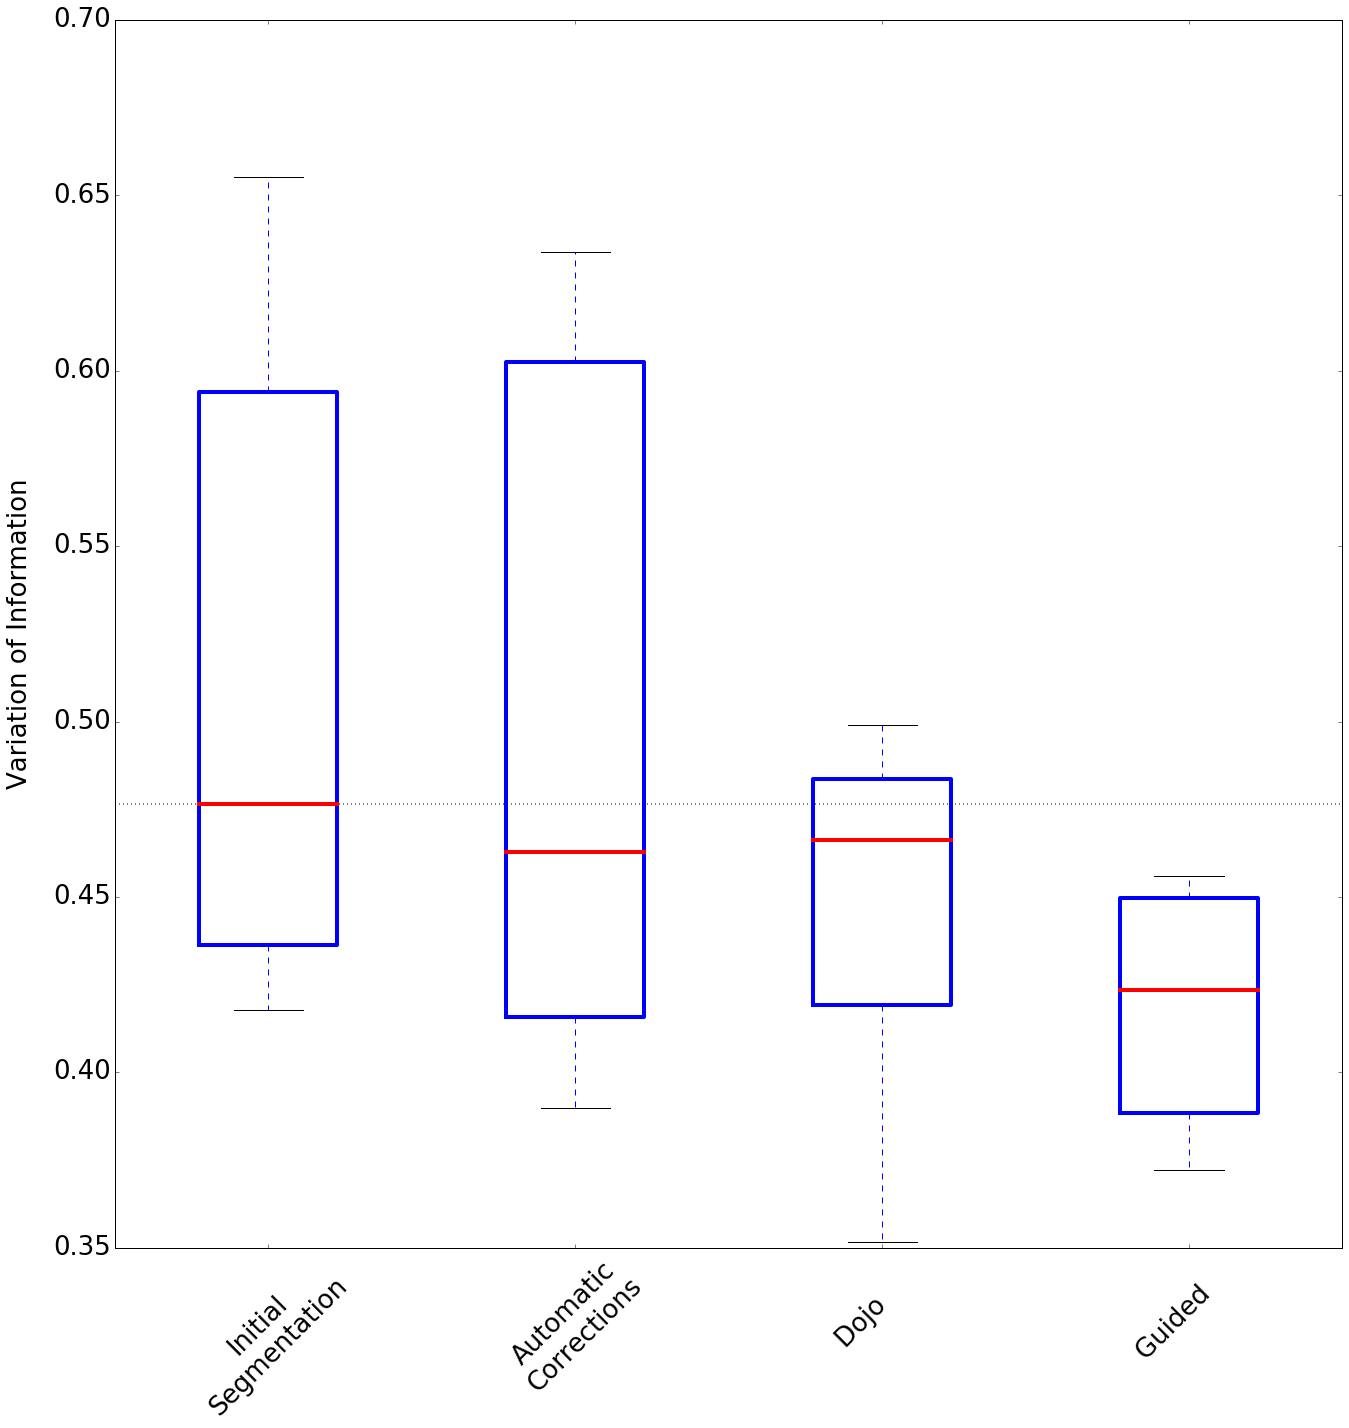

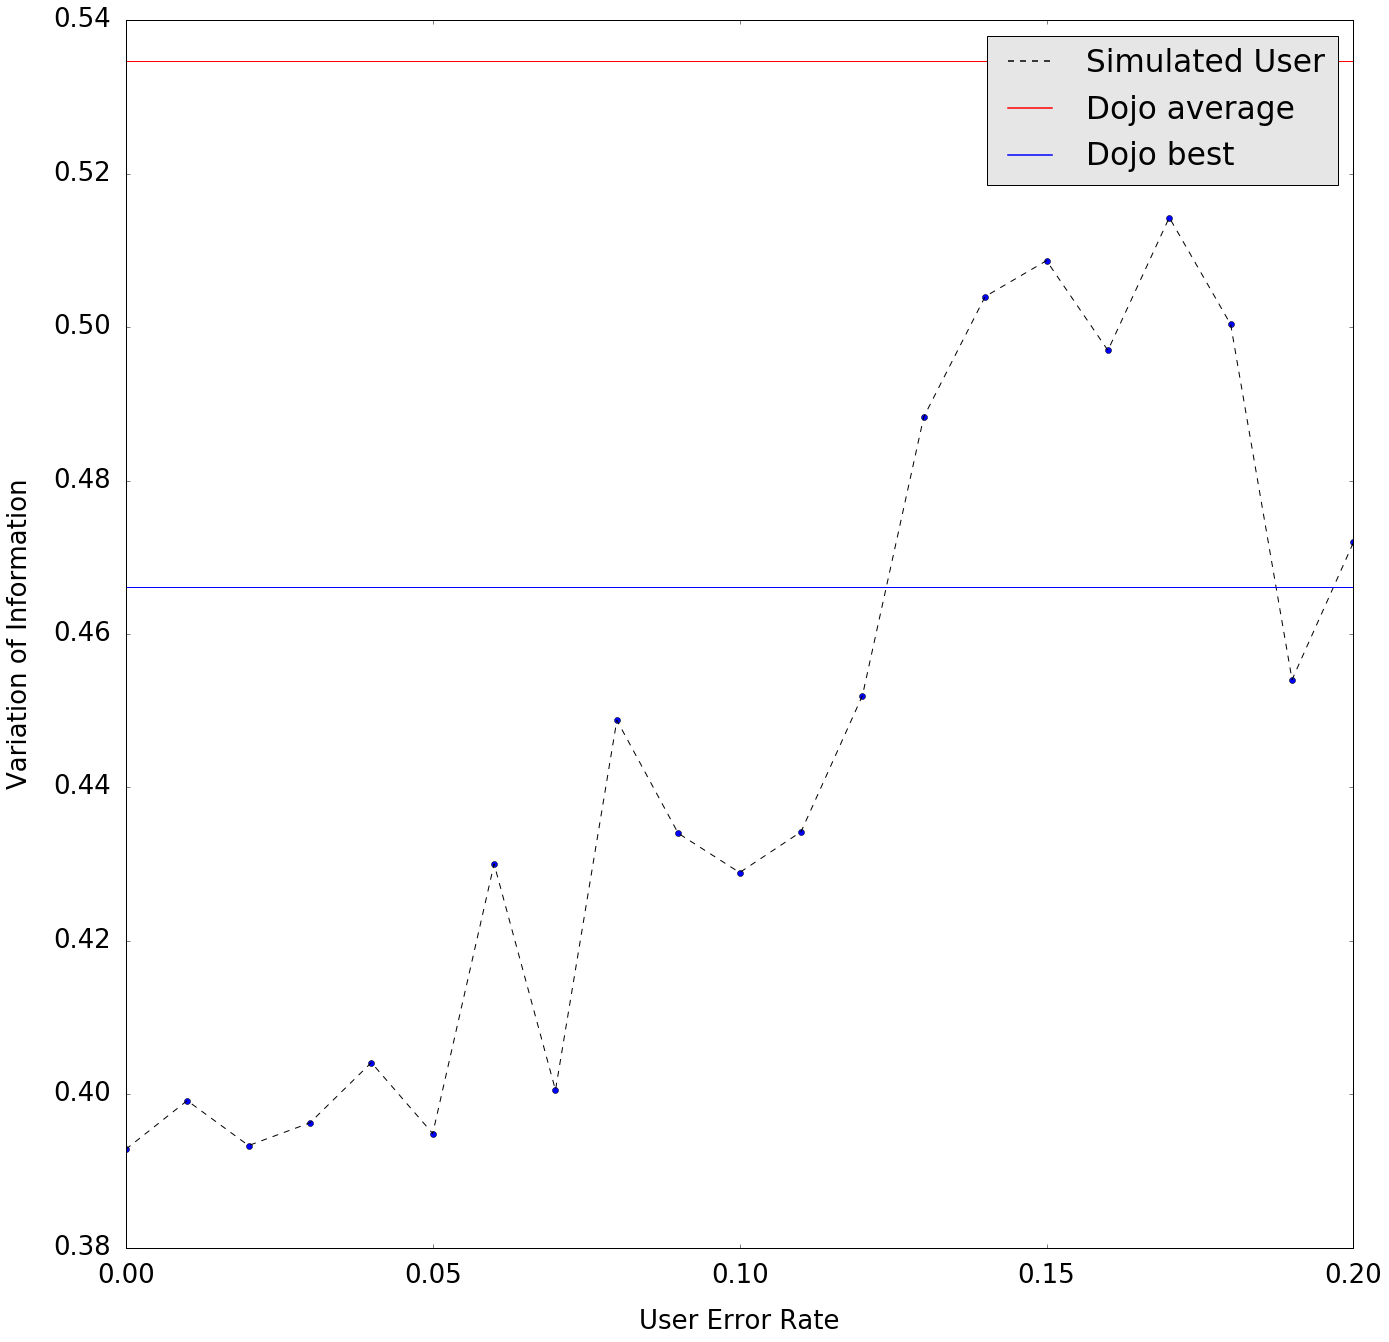

In [116]:
Stats.run_dojo_xp(cnn)

Loading cylinder bigM from file..

Loading merge errors p < .05 and split errors p > .95 from file..
   Mean VI improvement 0.0372496622998
   Median VI improvement 0.0371298478958

Loading merge errors p < .01 and split errors p > .99 from file..
   Mean VI improvement 0.0314423638613
   Median VI improvement 0.0345811971565

Loading merge errors and split errors (simulated user) from file..
   Mean VI improvement 0.0909070209344
   Median VI improvement 0.0887838008133


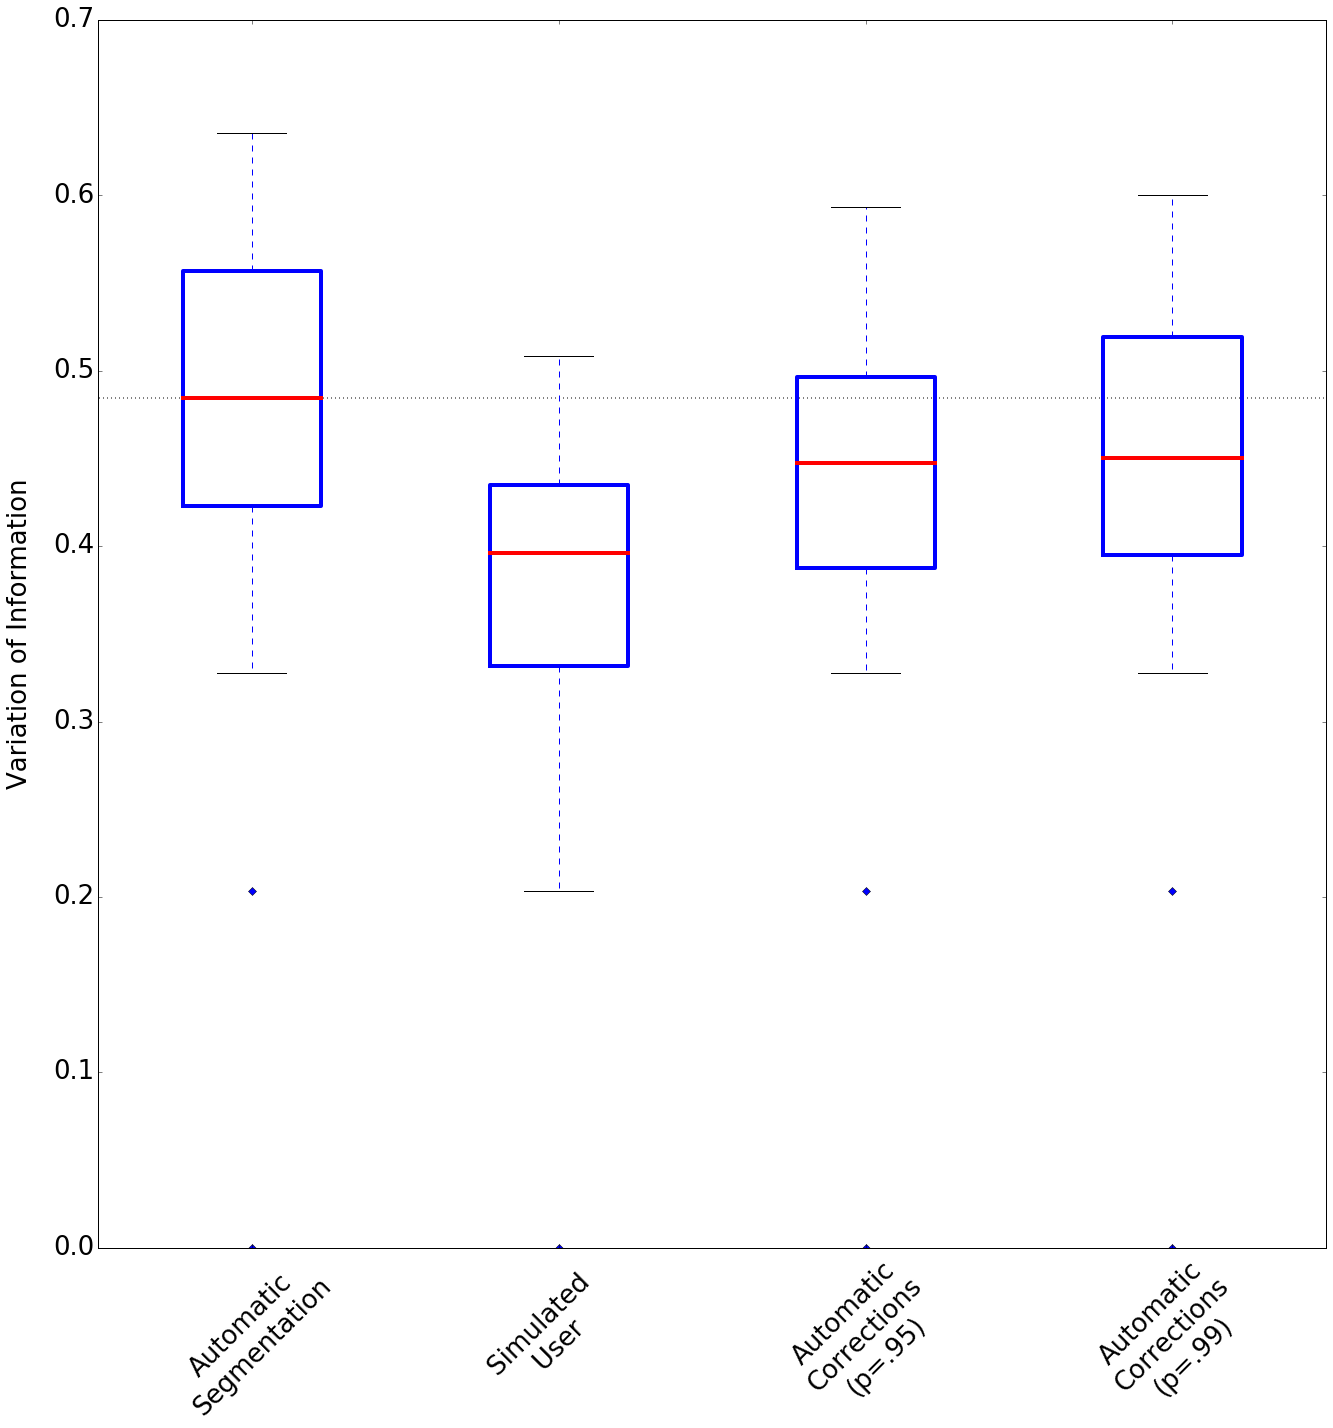

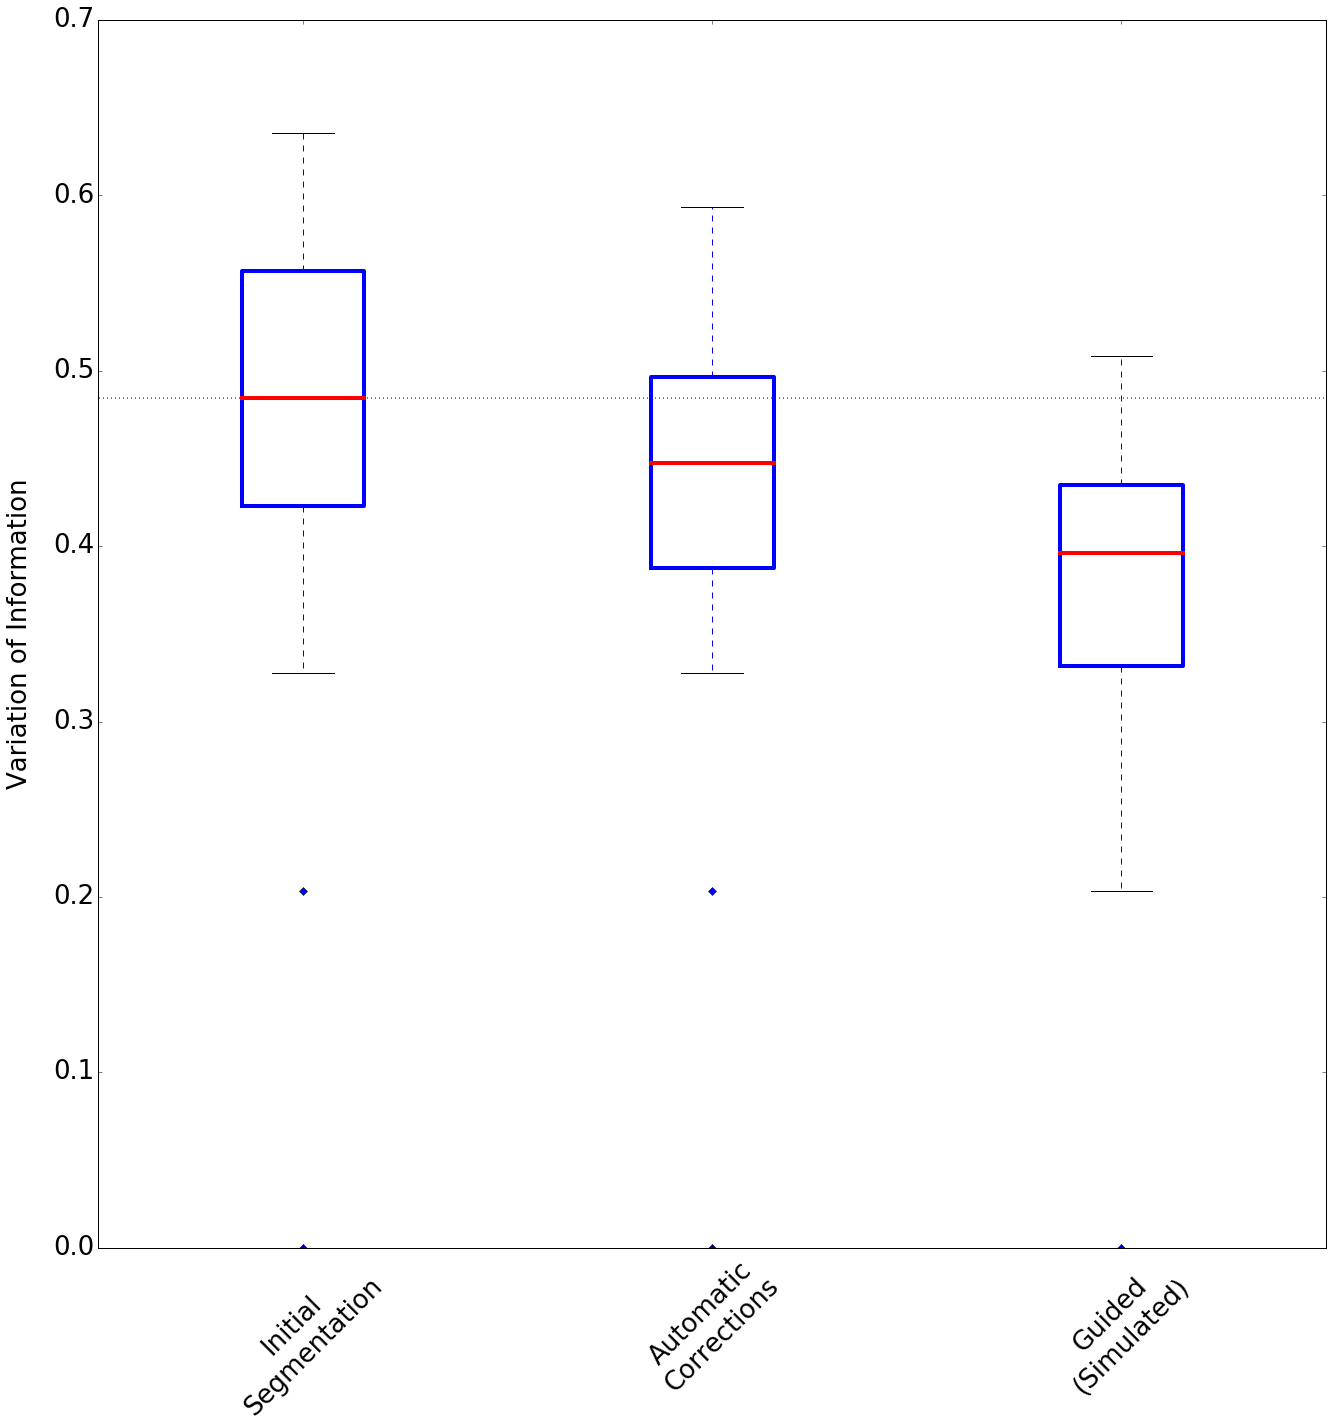

/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


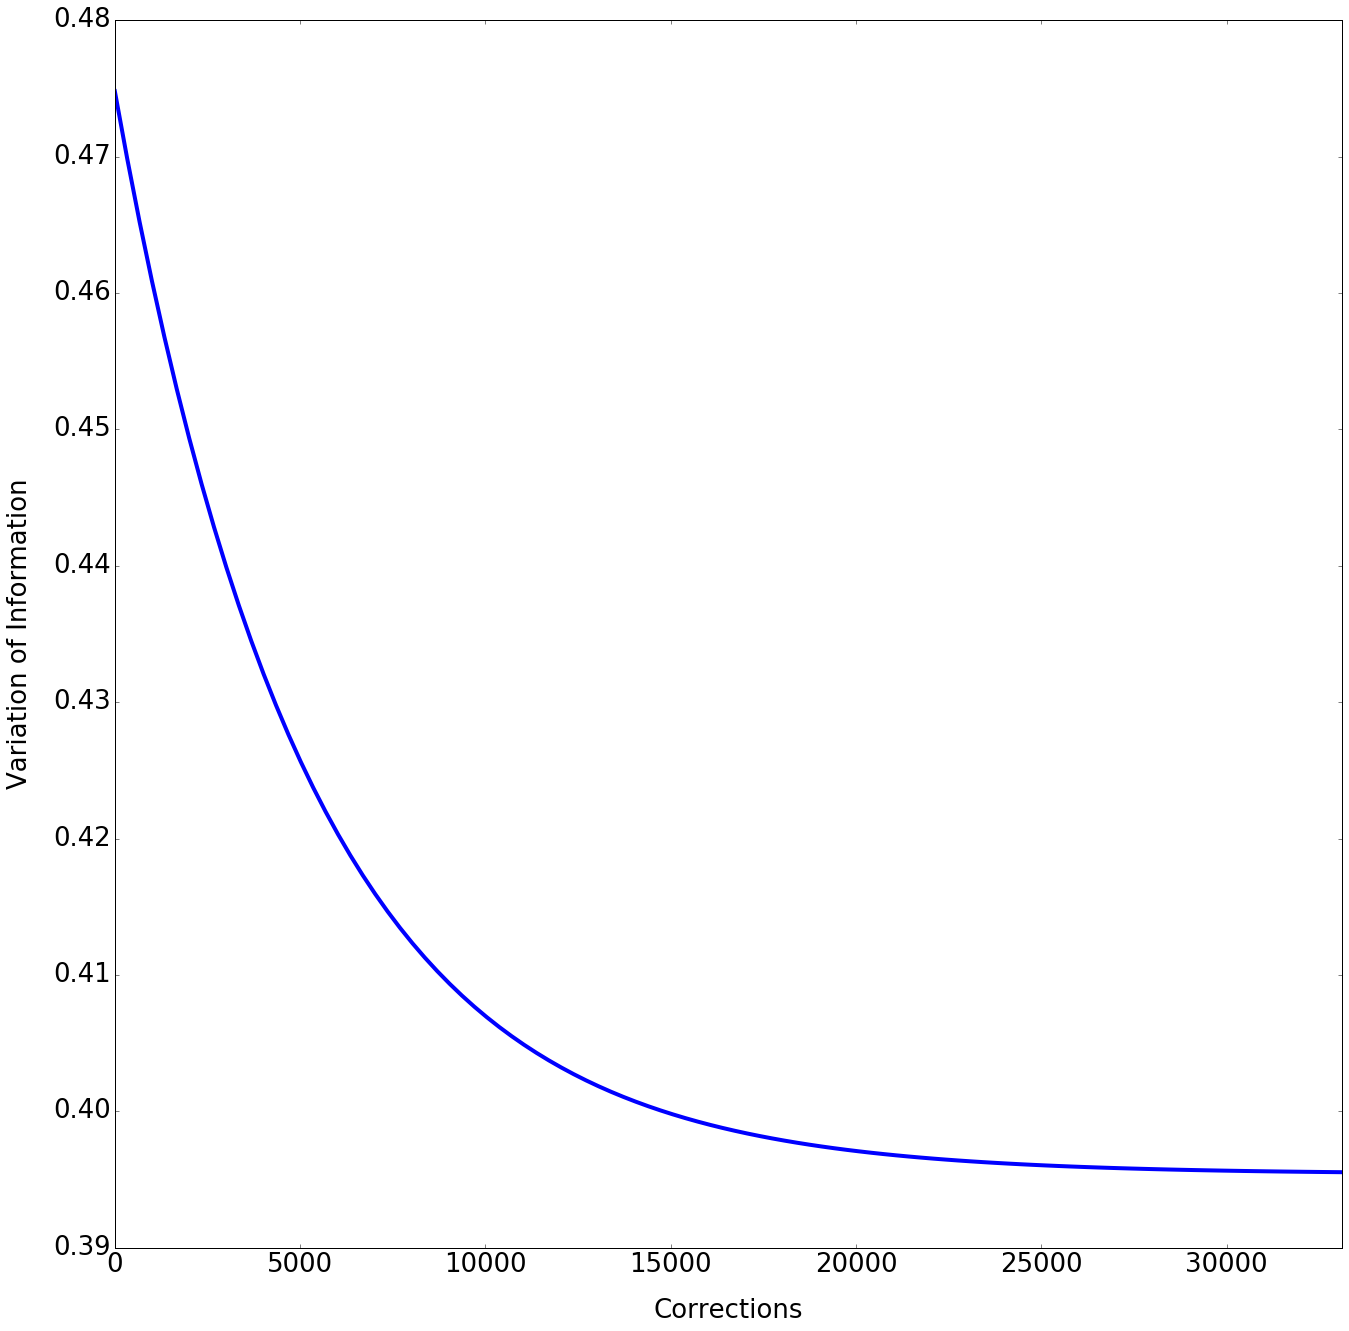

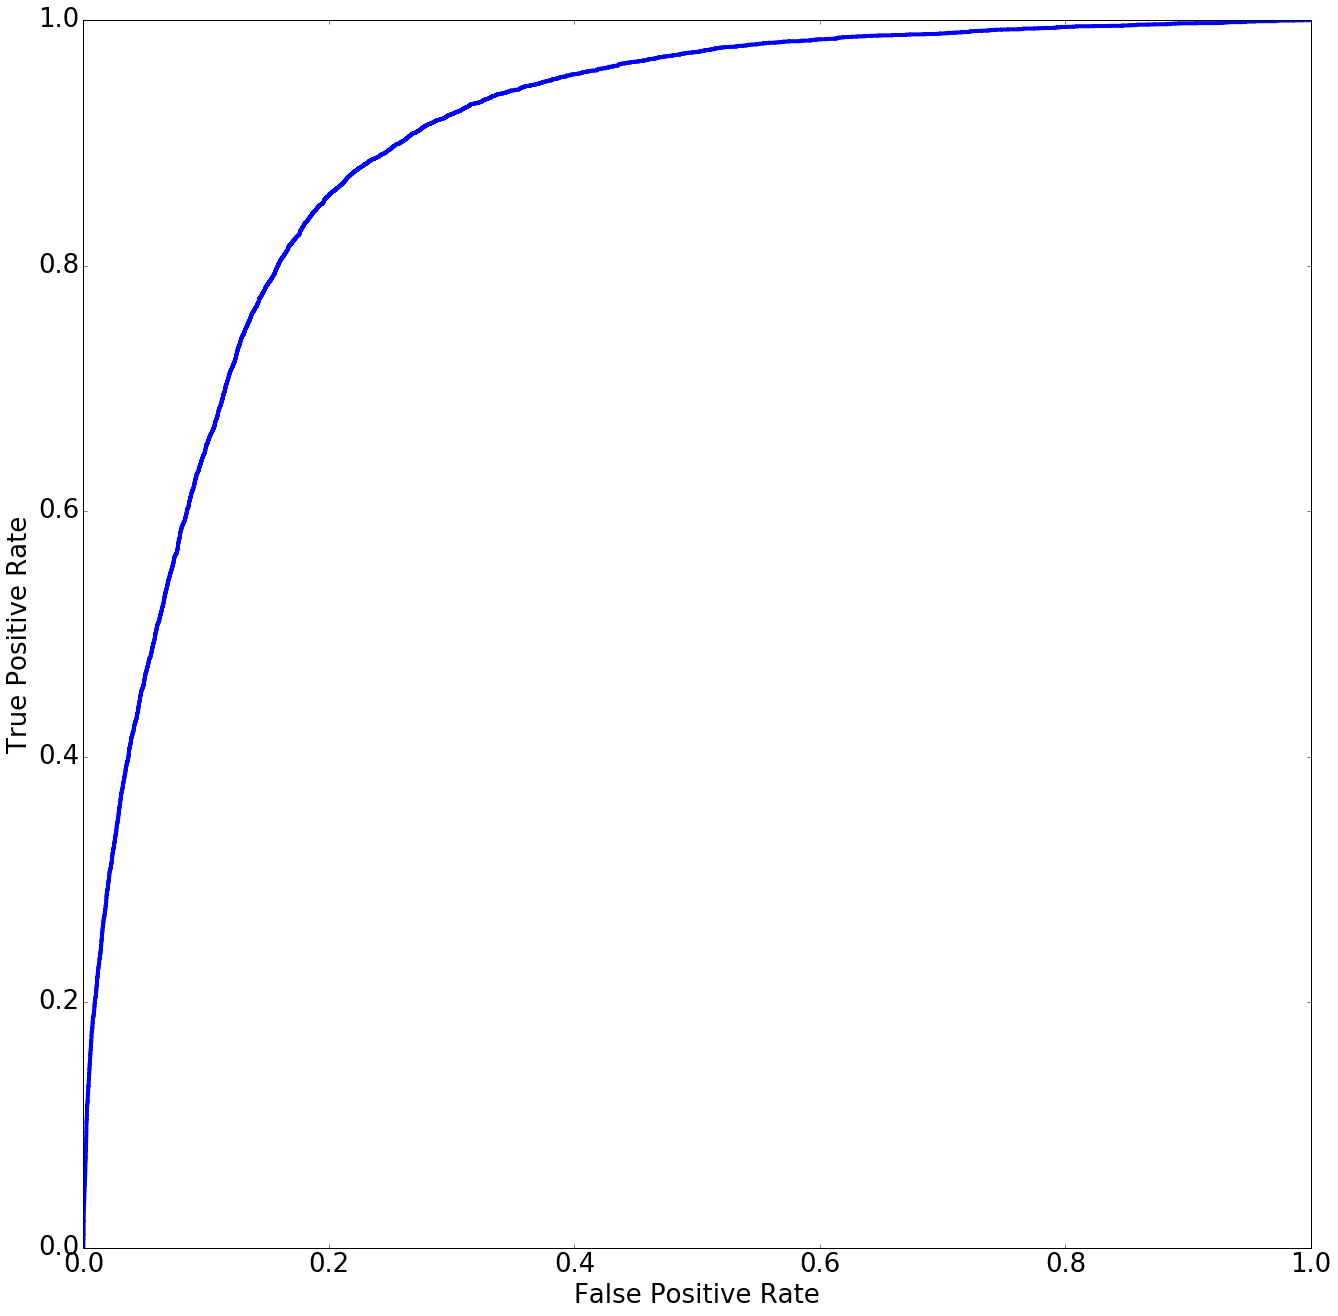

In [117]:
fixes, proofread_vis = Stats.run_cylinder_xp(cnn)

NameError: global name 'np' is not defined

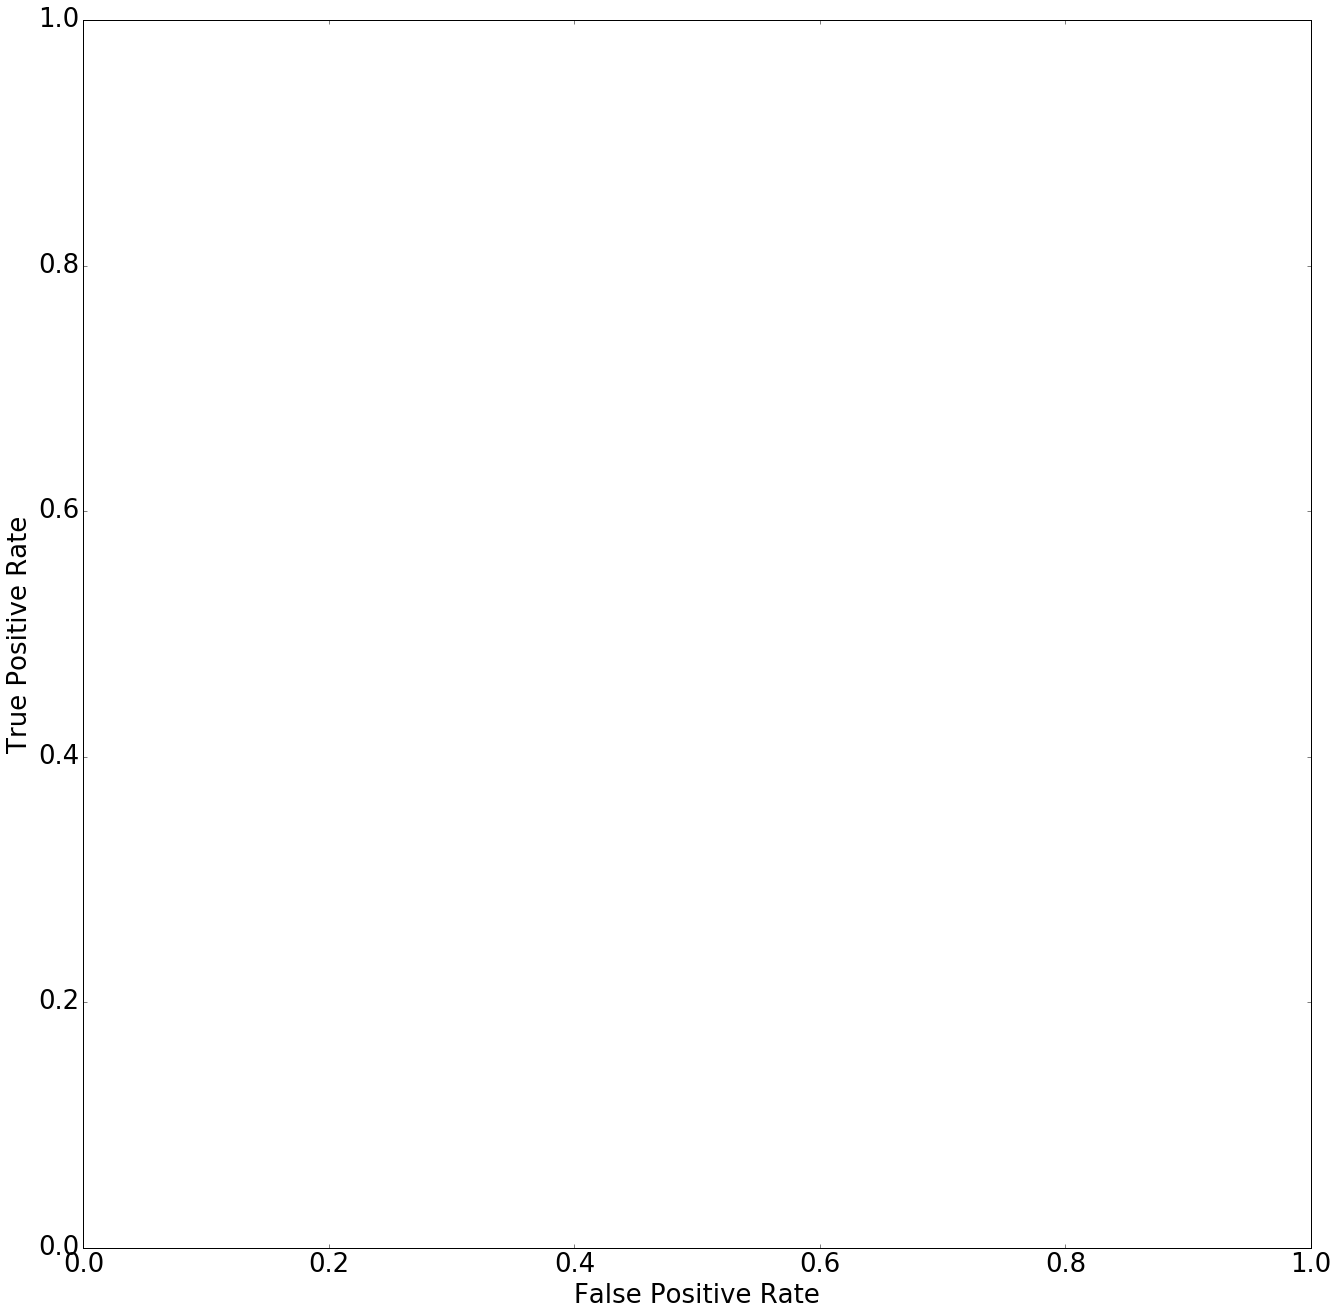

In [15]:
    from collections import Counter

    counts = Counter(fixes)
    P = counts['Good']
    N = counts['Bad']
    TP_P = []
    TN_N = []
    for i,f in enumerate(fixes):
        counts_ = Counter(fixes[0:i+1])
        TP_P.append(float(counts_['Good'])/P)
        TN_N.append(float(counts_['Bad'])/N)    


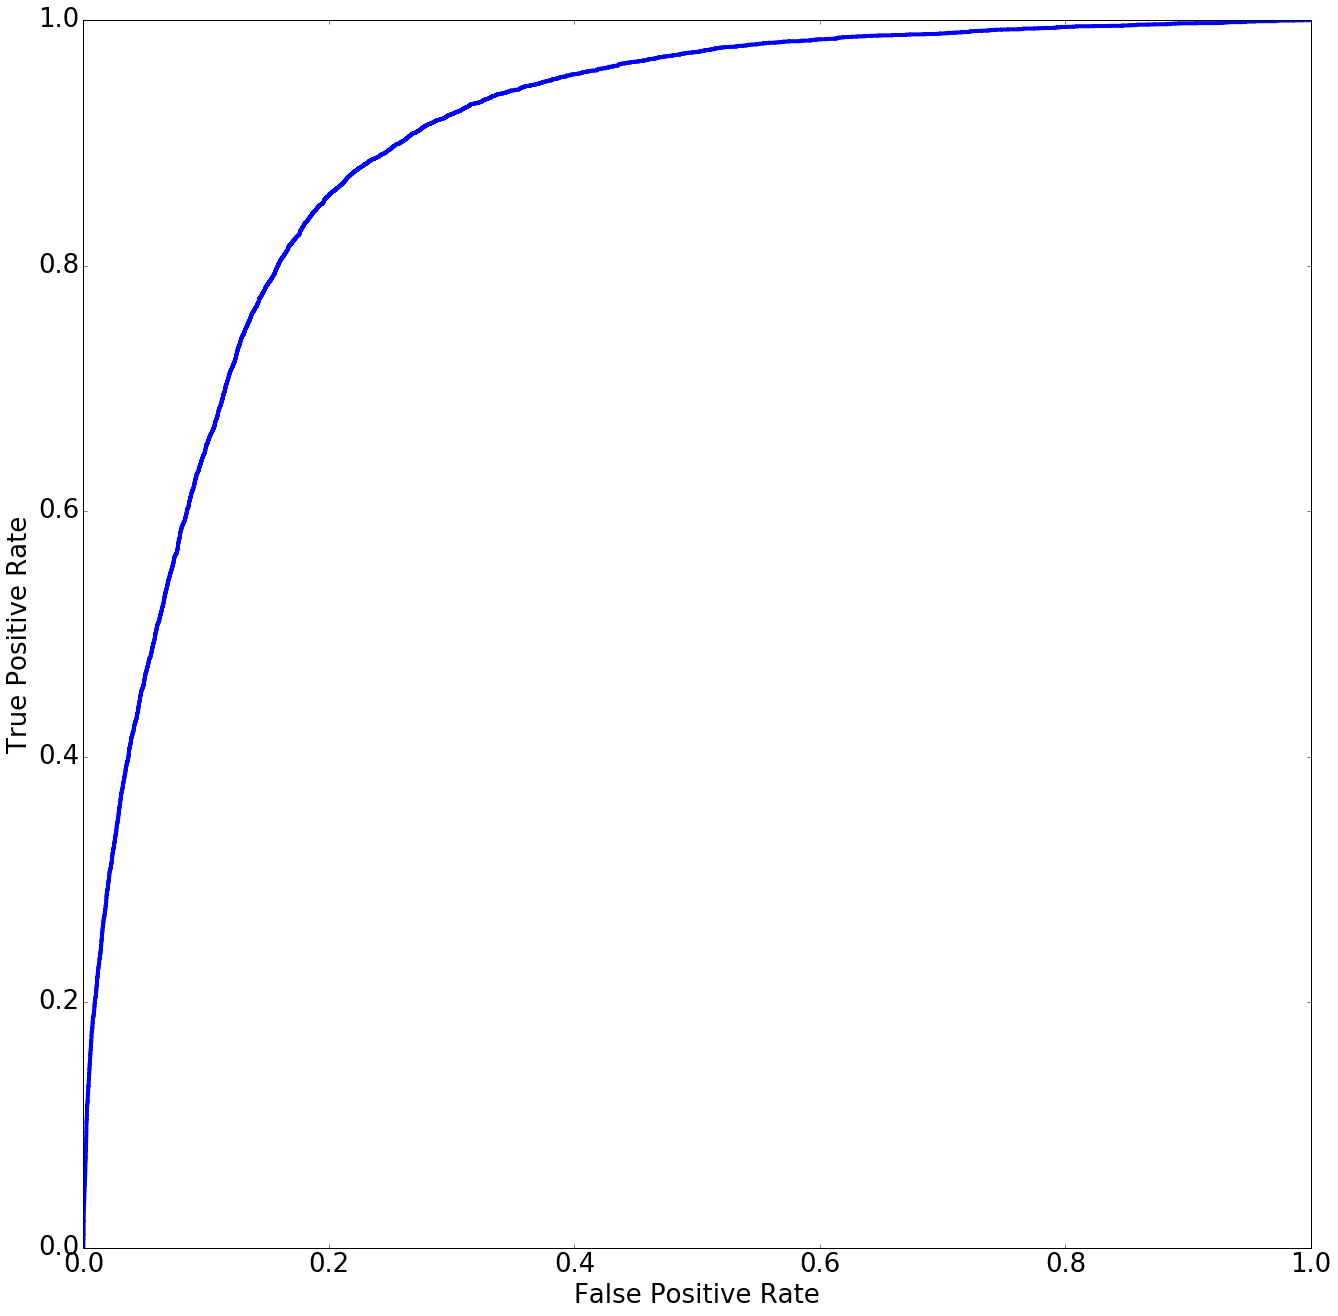

In [107]:
    import numpy as np
    from scipy.interpolate import interp1d
    fig, ax = plt.subplots(figsize=(22,22))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    from scipy.optimize import curve_fit

    def green_func(x, a, b, c):
        return a*np.exp(-b*x)+c

    def red_func(x, a, b, c):
        return 1-a*np.exp(-b*x)+c
    

#     popt, _ = curve_fit(green_func, x_marks, good_fixes_per_minute, p0=(1, 1e-6, 1))
    goodx = np.linspace(0,len(TP_P),len(TP_P))
#     goody = green_func(goodx, *popt)
    popt2, _ = curve_fit(red_func, goodx, TP_P)#, p0=(1, 1e-6, 1))
    bady = red_func(goodx, *popt2)
    
#     ax.plot(TN_N, TP_P)
    ax.plot(TN_N, TP_P, linewidth=4)
#     f2 = interp1d(goodx, TP_P, kind='cubic')
#     ax.plot(TN_N, f2(TP_P))
#     ax.plot(TN_N, bady, linewidth=4)

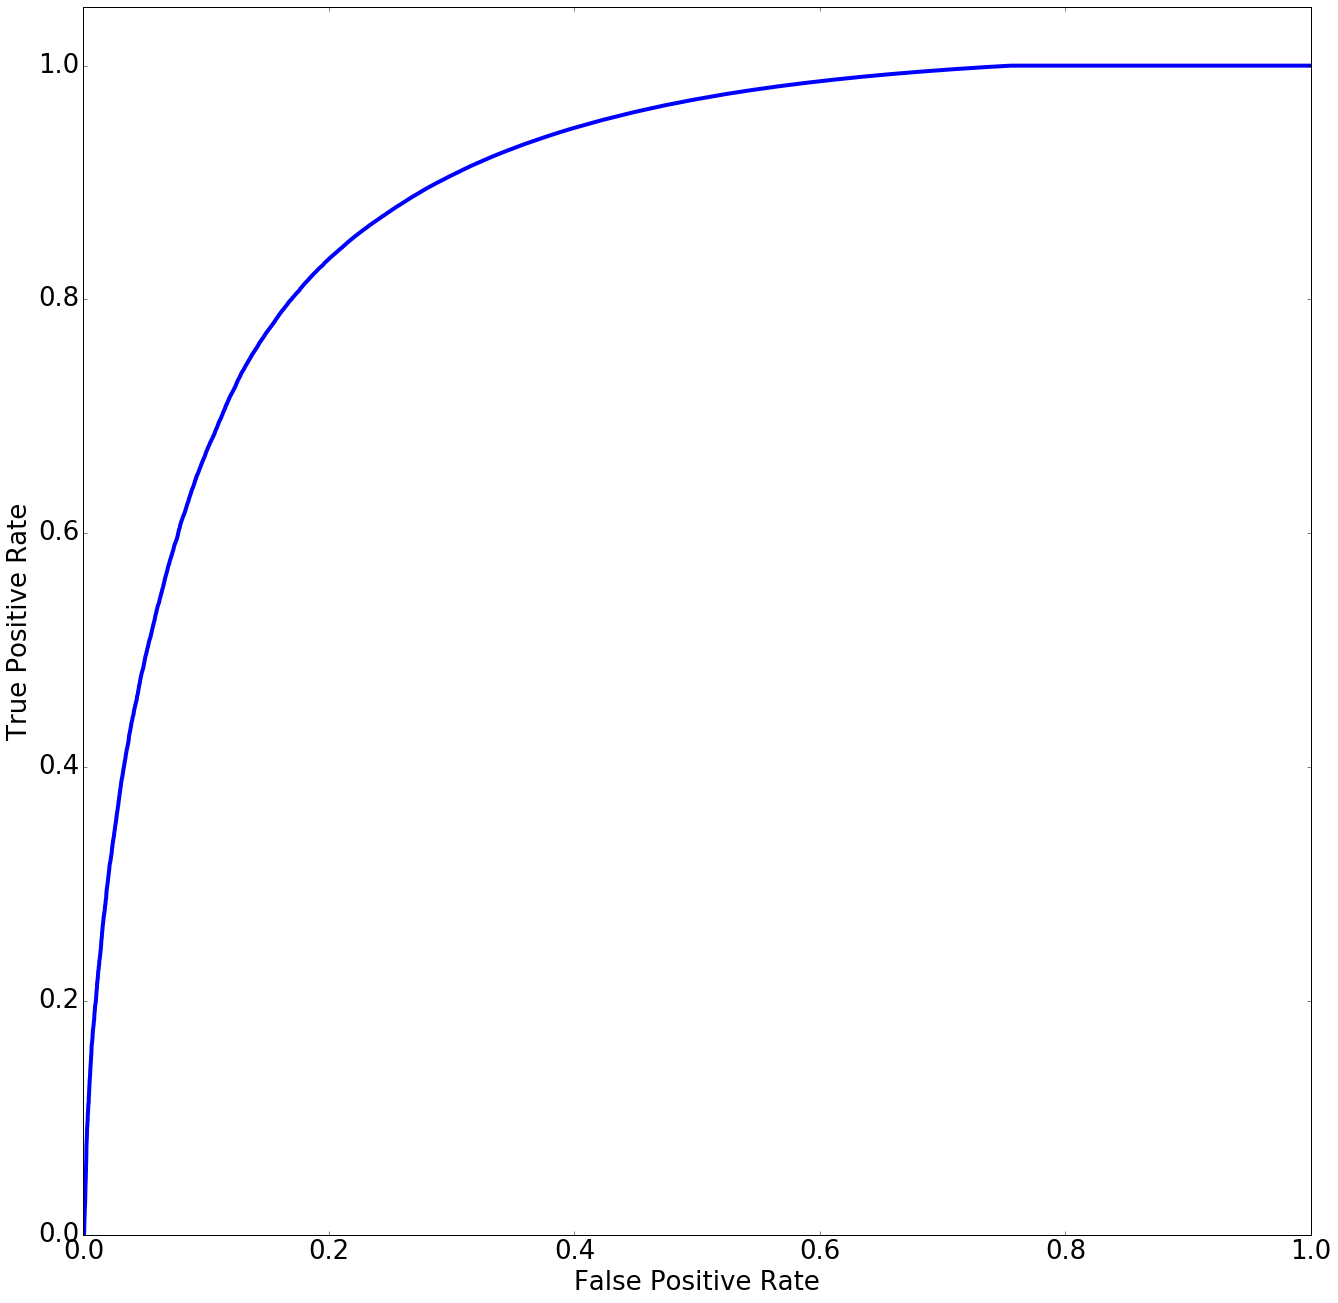

In [118]:
    import numpy as np
    fig, ax = plt.subplots(figsize=(22,22))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    from scipy.optimize import curve_fit

    def green_func(x, a, b, c):
        return a*np.exp(-b*x)+c

    def red_func(x, a, b, c):
        return a*np.exp(-b*x)+c
    

#     popt, _ = curve_fit(green_func, x_marks, good_fixes_per_minute, p0=(1, 1e-6, 1))
    goodx = np.linspace(0,len(TP_P),len(TP_P))
#     goody = green_func(goodx, *popt)
    popt2, _ = curve_fit(red_func, goodx, TP_P)#, p0=(1, 1e-6, 1))
    bady = red_func(goodx, *popt2)
    
#     ax.plot(TN_N, TP_P)
#     ax.plot(TN_N, TP_P, linewidth=4)plt
    plt.xlim(0,1)
    plt.ylim(0,1.05)
    ax.plot(TN_N, np.clip(bady,0,1), linewidth=4)

In [20]:
len(bady)


0

In [55]:
popt2, _ = curve_fit(red_func, TN_N, TP_P)# p0=(1, 1e-6, 1))
bady = red_func(np.multiply(TN_N,1000), *popt2)

In [29]:
popt2

array([ 0.87685782,  9.77136655, -0.01404694])

In [36]:
    def red_func(x, a, b, c):
        return 1-a*np.exp(-b*x)+c

In [54]:
red_func(np.multiply(TN_N,1000),0.87685782,  9.77136655, -0.01404694)

array([ 0.86281088,  0.86281088,  0.86281088, ..., -0.01404694,
       -0.01404694, -0.01404694])

In [53]:
np.exp(-0.1*np.multiply(TN_N, 100))

array([  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
         4.54334291e-05,   4.54166763e-05,   4.53999298e-05])

array([   0.        ,    0.        ,    0.        , ...,   99.99262401,
         99.996312  ,  100.        ])

In [72]:
vi_s_per_correction = [np.median(proofread_vis[0])]
for m in proofread_vis[1:]:
    for i in range(30*12):
        vi_s_per_correction.append(np.median(m))

In [67]:
len(vi_s_per_correction)

33121

In [70]:
x_marks.shape

AttributeError: 'list' object has no attribute 'shape'

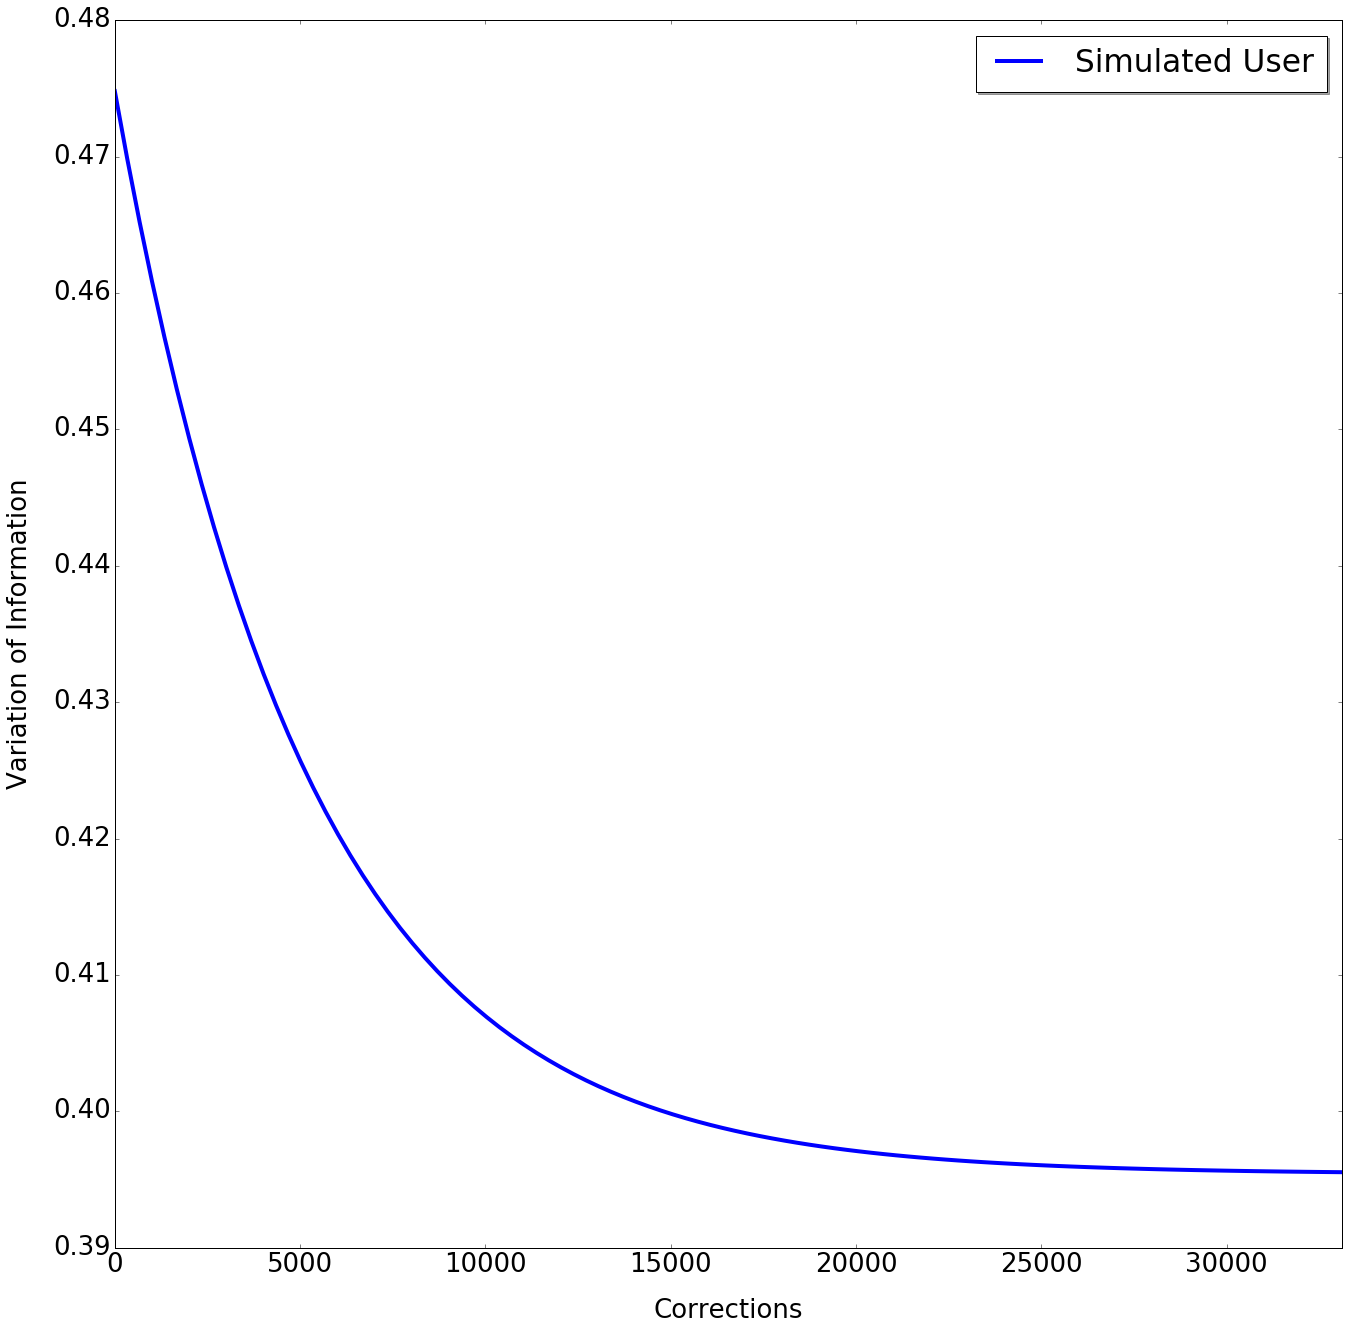

In [76]:
fig, ax = plt.subplots(figsize=(22,22))

x_marks = range(len(vi_s_per_correction))
def green_func(x, a, b, c):
    return a*np.exp(-b*x)+c
popt, _ = curve_fit(green_func, x_marks, vi_s_per_correction)

xx = np.linspace(0,len(vi_s_per_correction),100)
mediany = green_func(xx, *popt)

# ax.plot(x_marks, median_vis_per_min, 'r', label='Simulated User')

ax.plot(xx, mediany, linewidth=4, label='Simulated User')
# ax.axvline(x=403, ymin=0, ymax=.245, color='b', linestyle='dashed', linewidth=2)

plt.ylabel('Variation of Information', labelpad=20)

plt.xlabel('Corrections', labelpad=20)
plt.xlim([0,len(vi_s_per_correction)])
# plt.ylim([0.4,0.5])


legend = ax.legend(loc='upper right', shadow=True)

font = {'family' : 'normal',
        'size'   : 26}

plt.rc('font', **font)

plt.show()

In [120]:
import mlproof as mlp
X_train, y_train, X_test, y_test = mlp.Patch.load('cylinder1')

Loaded /home/d/patches//cylinder1/ in 0.000625848770142 seconds.


In [121]:
y_score = cnn.score(X_train, y_test)

TypeError: object of type 'NpzFile' has no len()

In [144]:
len(fixes)

33430

In [145]:
len(y_test)

26816

In [168]:
cnn.batch_iterator_train.batch_size

100

In [170]:
cnn.train_history_[-32]

{'dur': 796.1506400108337,
 'epoch': 150,
 'train_loss': 0.16705978449941697,
 'train_loss_best': False,
 'valid_accuracy': 0.94657878560207642,
 'valid_loss': 0.14009717465353855,
 'valid_loss_best': True}

In [173]:
cnn.on_epoch_finished[2].patience

30